<a href="https://colab.research.google.com/github/shevtsovasofi/programming_sofi/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%229_vk_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Установка VK API

In [1]:
!pip install vk_api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.8 MB/s eta 0:00:00


Получаем токен на vkhost;

- выбираем vk.com

- принимаем условия

- копируем код из строки браузера (да-да, там, где написано "не копируйте")

Токен живет 1 час, он расположен между `https://oauth.vk.com/blank.html#access_token=` и `user_id=61895623`

```
https://oauth.vk.com/blank.html#access_token=vk1.a.RE6injcS5Q9hmaeBA8YSMCT-XemjWp4mgEi6NdVBQKRtzjXhGQNbVVGR8ylOagkC-lGiSZJ095OAaocKcadQHUOSkFI-HfecdsifxUrJTixM1wFr5IUyvXxWPkH9_iAU8RoOjciGp83jvhZfQD9yAQzdARKM4j9YG6emNdouslj0rHjIIyqMGIZqURuK41tD16wRZ8VyZ0gHgEEPwgWzBw&expires_in=86400&user_id=61895623
```

Токен привязан к вашему IP, поэтому запускаем его локально!

In [2]:
# https://vkhost.github.io/

import vk_api

vkApiSession= vk_api.VkApi(token="vk1.a.lZ8ZA6RjrbYc1JBhEsi8pRsrpbOTnt55S7d1esCcUmuCotCcvBoWEpxtepg1KdESPYmD8uiK-miUo9VCWaOS6e4pdfEYDYawxAgY1akAMxhvTLy6y-2LDgn6qJvyZYpZk5ETziYtZFkq5bGdku6O9hU6XbyEIi_pA6blKPRfICBxXxtqH7YcD4jpiaIyXo7eeaGWcko3zT03V51v9kBqqQ")

vk = vkApiSession.get_api()

`-20629724` - ID паблика "Хабр" ВК

ID пользователей имеют вид `00000000`

ID сообществ имеют вид `-00000000`

Выгрузим 100 верхних постов и выведем результат

In [3]:
posts = vk.wall.get(owner_id=-20629724, count=100)['items']
posts

[{'inner_type': 'wall_wallpost',
  'ads_easy_promote': {'type': 2,
   'text': 'Что-то пошло не так.',
   'label_text': '',
   'button_text': '',
   'is_ad_not_easy': False},
  'is_pinned': 1,
  'comments': {'can_post': 1, 'count': 0, 'groups_can_post': True},
  'marked_as_ads': 0,
  'hash': 'gUiqeNBV1WdhtTcf_8In6yj6Ov1G',
  'type': 'post',
  'push_subscription': {'is_subscribed': False},
  'attachments': [{'type': 'photo',
    'photo': {'album_id': -7,
     'date': 1734013862,
     'id': 457329654,
     'owner_id': -20629724,
     'access_key': '31443f228f9fc526d1',
     'post_id': 1600618,
     'sizes': [{'height': 68,
       'type': 'm',
       'width': 130,
       'url': 'https://sun1-87.userapi.com/s/v1/ig2/cFb1GdMDaR19GH0HgS7tVX-22fjAkU4ZXd1yy5fj1A6SZiD9VhUm5Coa_4C9-U_9y-Te6gP601W3fEv7O6ju3lAG.jpg?quality=96&as=32x17,48x25,72x38,108x57,160x84,240x126,360x189,480x252,540x283,640x336,720x378,1080x567,1200x630&from=bu&u=wHc3g-0GY4FF1Bw_lXGVzMZ8dUVFF7Vyy_9l8QwLm-8&cs=130x68'},
      {

**Задание**

1. Изучите [**документацию VK API**](https://dev.vk.com/ru/method/wall)

2. Выберите **сообщество** для скрейпинга данных

3. Произведите **парсинг** выгруженных данных:

- извлеките изображение под постом

- извлеките текст публикации

- извлеките любую статистику, например, количество просмотров

4. Сформируйте файл ***.csv**

Используйте шаблон:

   post_id        date                                               text  \
0     2128  1734420988  📍 [club57311413|Большой драматический театр]\n...   
1     2123  1734332400  📍[club22893127|Шереметевский дворец - Музей Му...   
2     2121  1734170401  📍[club67940544|Государственный Эрмитаж]\n\nЕсл...   
3     2111  1734075466  📍[club130074765|Мариинский театр]\n\n🎼 Джузепп...   
4     2110  1733986801  📍[club63976979|Александринский театр]\n\nФ.М. ...   

   likes  reposts  comments attachments  
0     40        3         2          []  
1     86        4         1          []  
2     92       11         0          []  
3    114       21         9          []  
4     62       10         0          []  
           post_id                           date       likes    reposts  \
count    35.000000                             35   35.000000  35.000000   
mean   2058.942857  2024-11-20 05:11:33.742856960   74.771429   8.257143   
min    1999.000000            2024-10-25 07:30:00   29.00

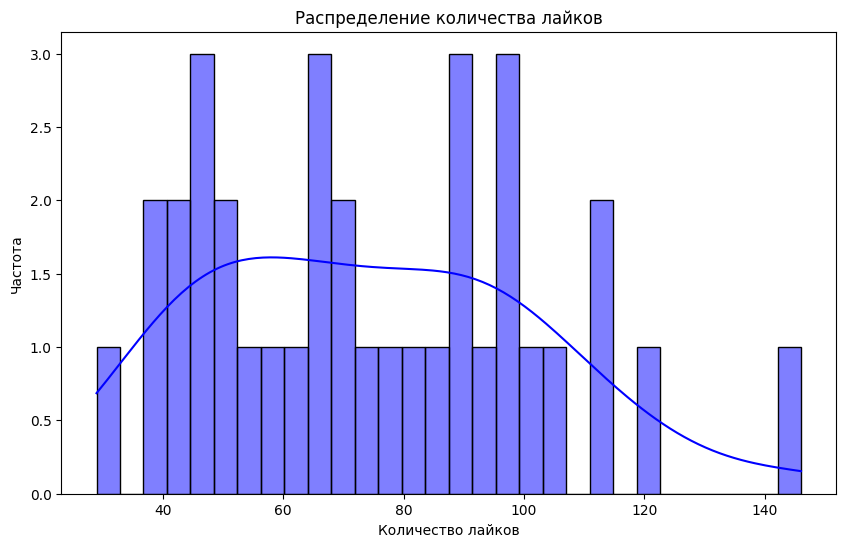

In [10]:
import vk_api
import csv
import pandas as pd

def scrape_wall_data(token, owner_id, count=10):
    """
    Функция скрепит данные со стены сообщества/пользователя вк.
    Какие аргументы она принимает? Принимает токен доступа к апи, айди пользователя/сооьщества, сколько постов на отскрейпить, по умолчанию будет 10
    Что она возвращает? Возвращает список с данными постов,
    """
    try:
        vk_session = vk_api.VkApi(token=token)
        vk = vk_session.get_api() #создаем сессию для работы в вк

        # Метод wall.get
        posts = vk.wall.get(owner_id=owner_id, count=count)['items'] # в переменную сохраняется список постов

        scraped_data = [] #в список добавляем информацию о посте

        # Парсим
        for post in posts:
            post_data = {
                'post_id': post['id'],
                'date': post['date'],  # Даты
                'text': post['text'],  # Тексты
                'likes': post['likes']['count'],  # лайки
                'reposts': post['reposts']['count'],  # репосты
                'comments': post['comments']['count'],  # комменты
                'attachments': [] #вложения-изображения
            }
            scraped_data.append(post_data)

        return scraped_data

    except vk_api.exceptions.ApiError as e:
        print(f"Error accessing VK API: {e}")
        return []

def save_to_csv(data, file_name='vk_wall_posts.csv'): #функция для сохранения в csv
    with open(file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=['post_id', 'date', 'text', 'likes', 'reposts', 'comments', 'attachments'])
        writer.writeheader()
        for row in data:
            writer.writerow(row)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def stats(file_name='vk_wall_posts.csv'):
    data = pd.read_csv(file_name)
    print(data.head())

    # Преобразование даты в читаемый формат (если необходимо)
    data['date'] = pd.to_datetime(data['date'], unit='s')

    # Простой анализ
    print(data.describe())  # Описание статистики (среднее, минимальное, максимальное значение)


    plt.figure(figsize=(10, 6)) #посмотрим лайки
    sns.histplot(data['likes'], kde=True, color='blue', bins=30)
    plt.title('Распределение количества лайков')
    plt.xlabel('Количество лайков')
    plt.ylabel('Частота')
    plt.show()
    pass

def main():
    # Введите ваш токен VK API
    token = 'vk1.a.lZ8ZA6RjrbYc1JBhEsi8pRsrpbOTnt55S7d1esCcUmuCotCcvBoWEpxtepg1KdESPYmD8uiK-miUo9VCWaOS6e4pdfEYDYawxAgY1akAMxhvTLy6y-2LDgn6qJvyZYpZk5ETziYtZFkq5bGdku6O9hU6XbyEIi_pA6blKPRfICBxXxtqH7YcD4jpiaIyXo7eeaGWcko3zT03V51v9kBqqQ'

    # Введите ID сообщества
    owner_id = -215584979

    # Введите количество публикаций для скрейпинга
    num_posts = 35

    wall_data = scrape_wall_data(token, owner_id, count=num_posts)
    if wall_data:
      save_to_csv(wall_data, file_name='vk_wall_posts.csv')
      stats(file_name='vk_wall_posts.csv')

    else:
      print("No data")

if __name__ == "__main__":
    main()